# Multiple Linear Regression

In [1]:
from IPython.display import Image

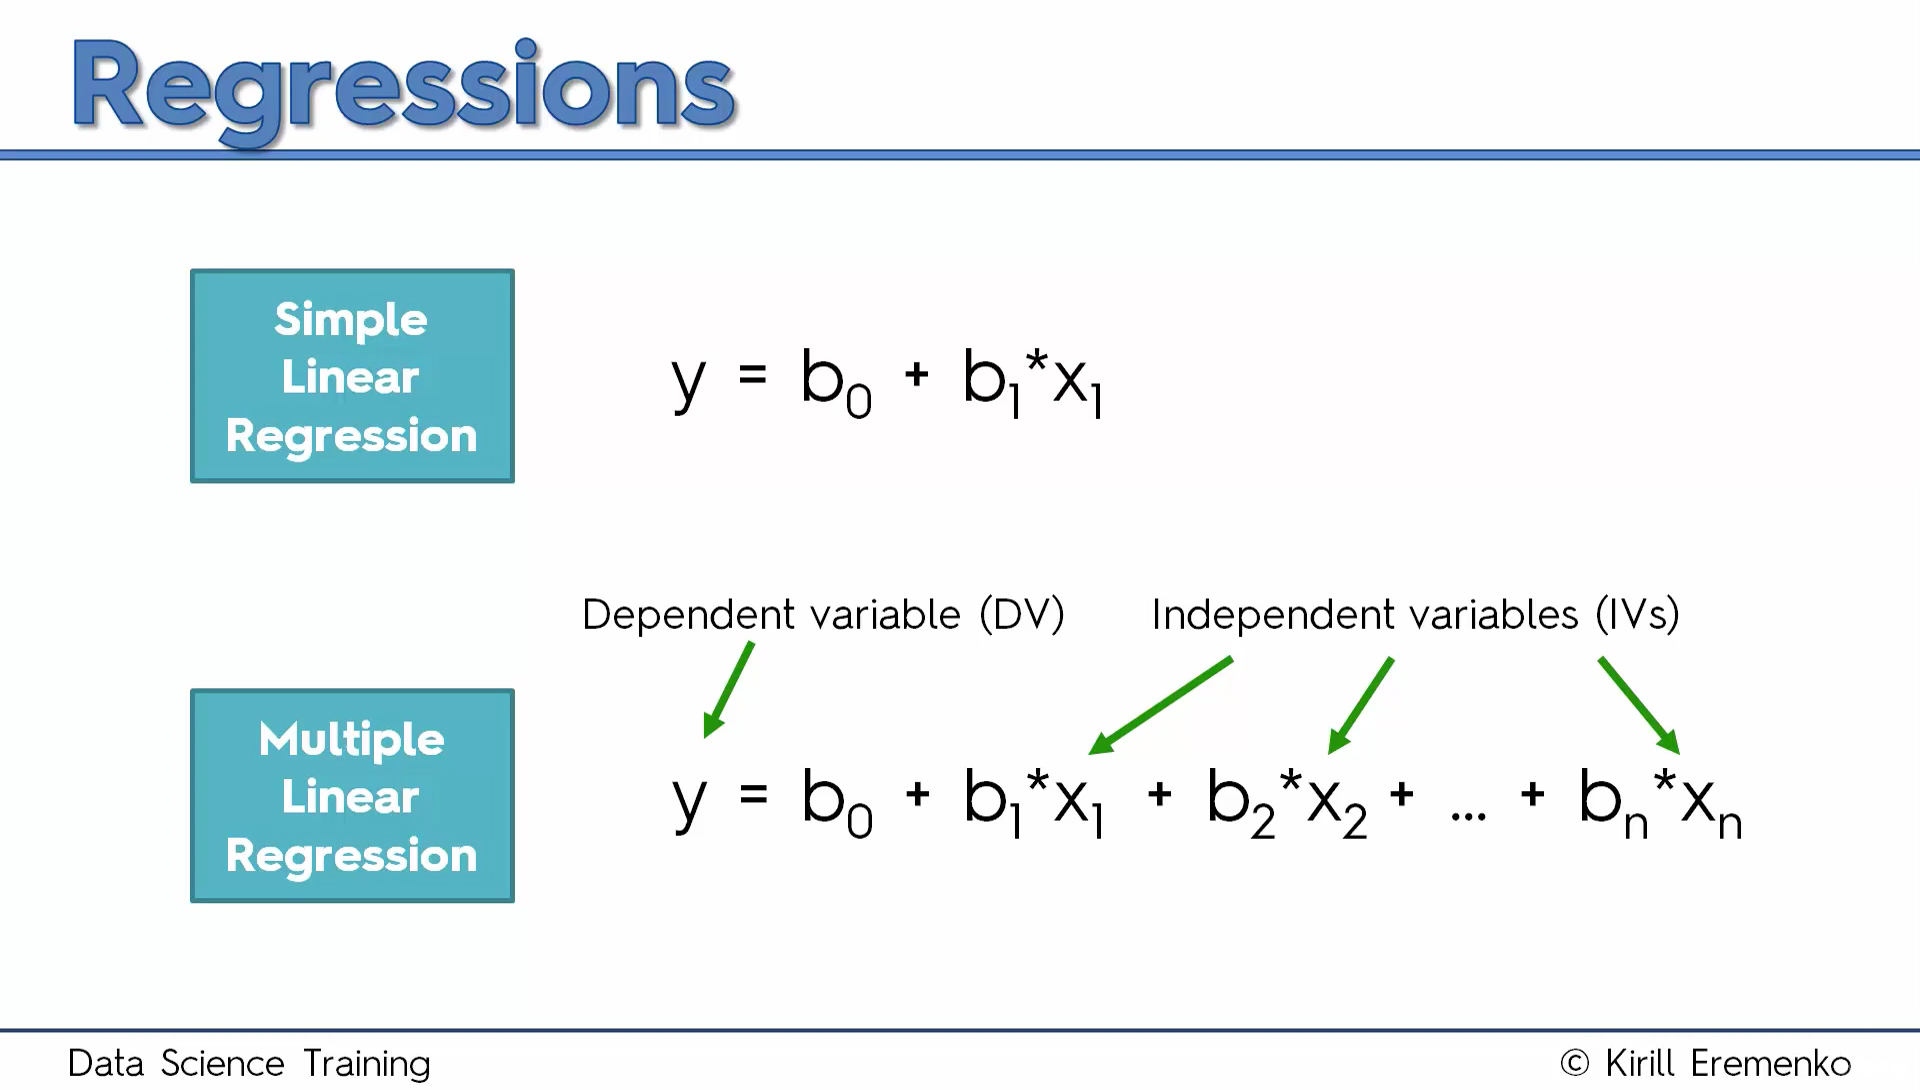

In [2]:
Image('img/01.png')

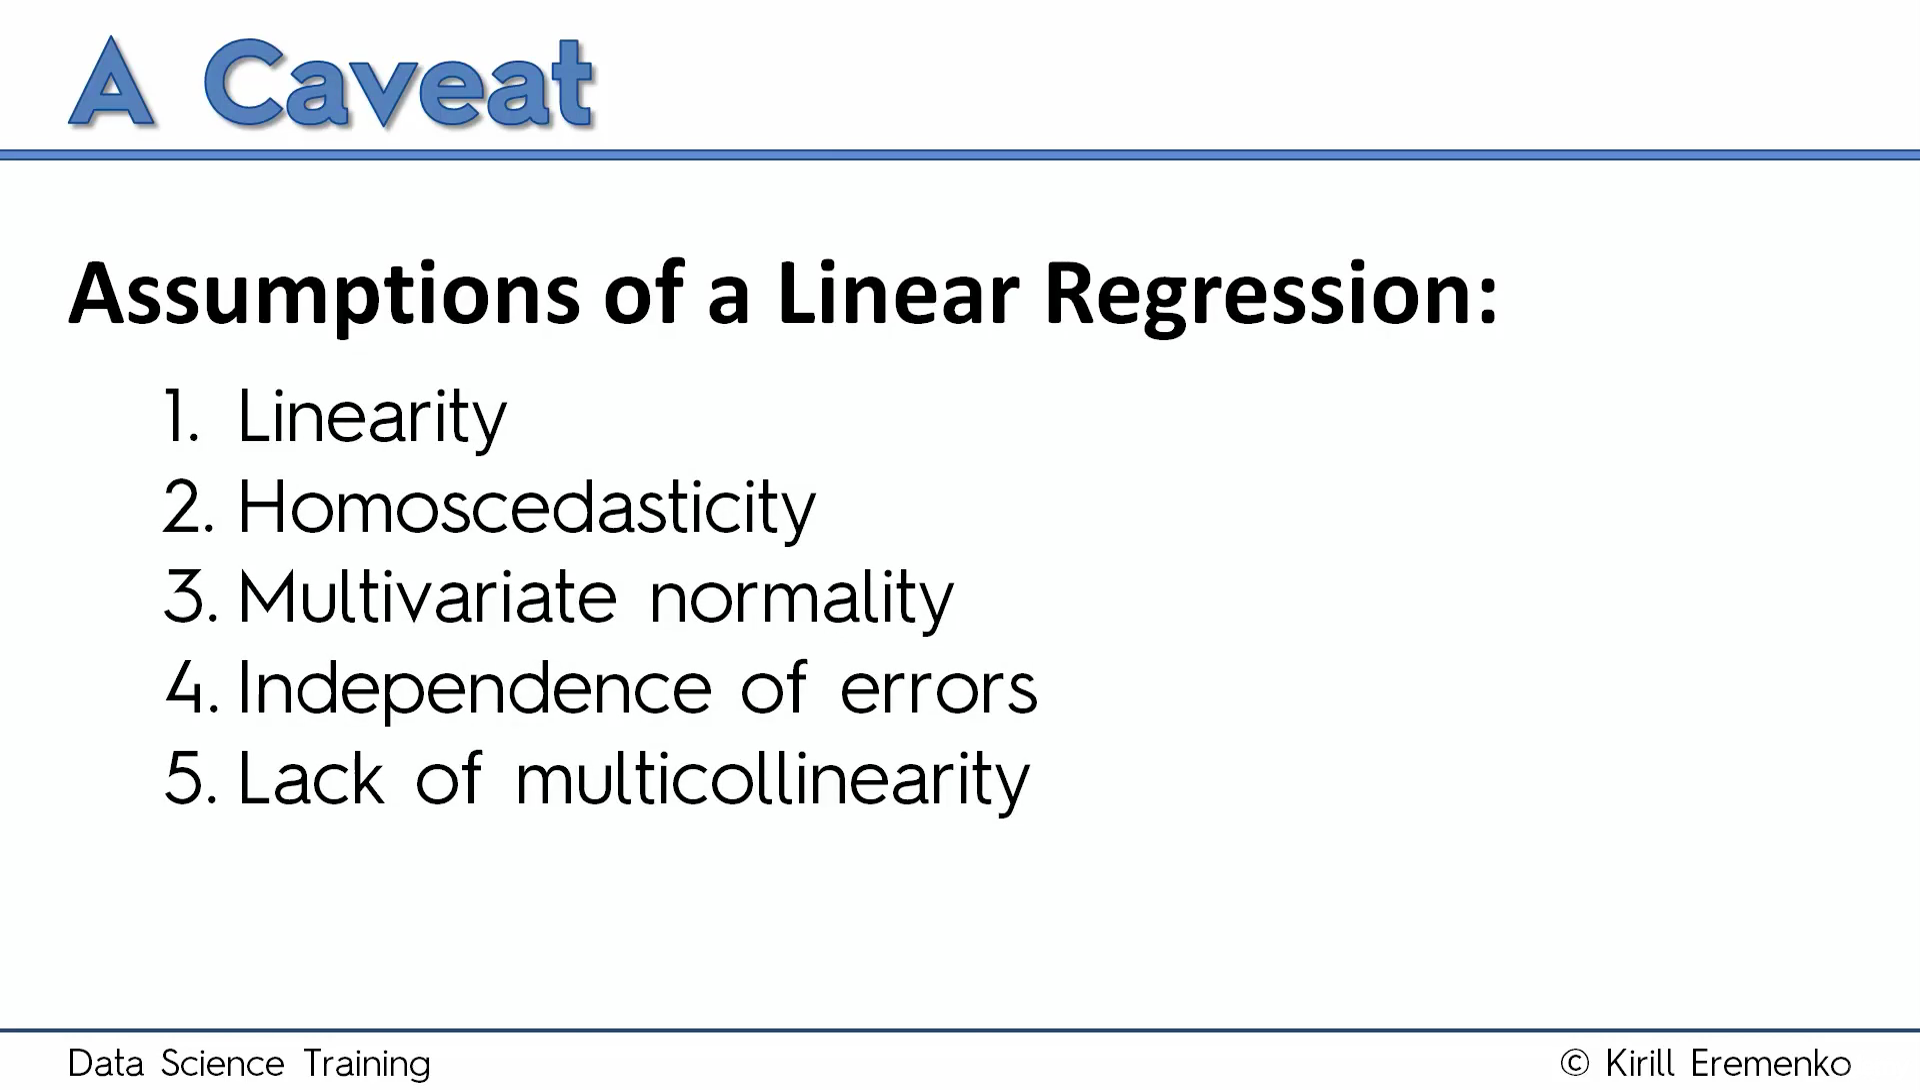

In [3]:
Image('img/02.png')

### Green = Dependent variable
### Blue = Independent variable

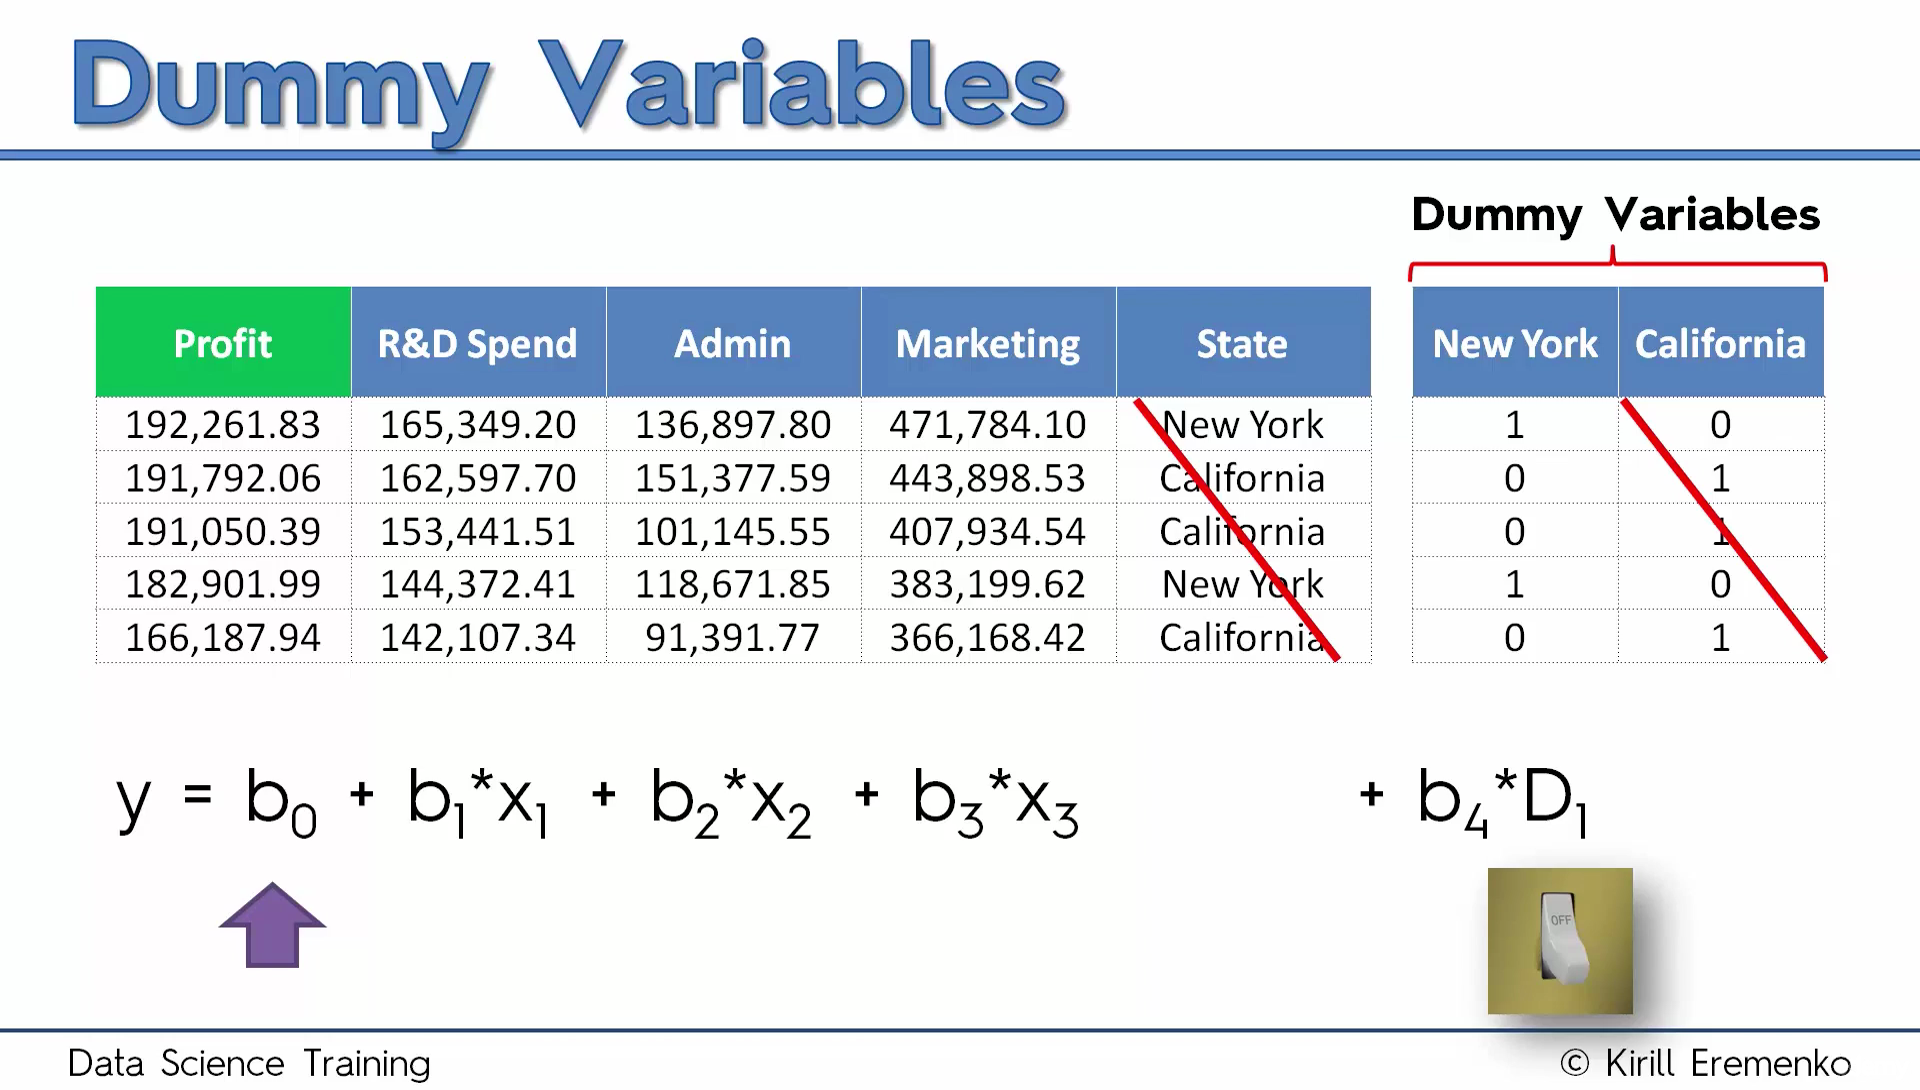

In [5]:
Image('img/03.png')

### Data Preprocessing

In [20]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
%matplotlib inline

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [21]:
X_train

array([[78389.47, 153773.43, 299737.29, 'New York'],
       [0.0, 135426.92, 0.0, 'California'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [27892.92, 84710.77, 164470.71, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [72107.6, 127864.55, 353183.81, 'New York'],
       [0.0, 116983.8, 45173.06, 'California'],
       [77044.01, 99281.34, 140574.81, 'New York'],
       [61136.38, 152701.92, 88218.23, 'New York'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [46014.02, 85047.44, 205517.64, 'New York'],
       [75328.87, 144135.98, 134050.07, 'Florida'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [76253.86, 113867.3, 298664.47, 'California'],
       [542.05, 51743.15, 0.0, 'New York'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [67532.53, 105751.03, 304768.73, 'Florida'],
       [22177.7

In [22]:
X_test

array([[101913.08, 110594.11, 229160.95, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [61994.48, 115641.28, 91131.24, 'Florida'],
       [1315.46, 115816.21, 297114.46, 'Florida'],
       [91749.16, 114175.79, 294919.57, 'Florida'],
       [165349.2, 136897.8, 471784.1, 'New York'],
       [28754.33, 118546.05, 172795.67, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [65605.48, 153032.06, 107138.38, 'New York'],
       [120542.52, 148718.95, 311613.29, 'New York']], dtype=object)

In [23]:
y_train

array([ 111313.02,   42559.73,  144259.4 ,   77798.83,  156991.12,
        191792.06,  156122.51,  105008.31,   14681.4 ,  108552.04,
         97483.56,  129917.04,   96479.51,  105733.54,  155752.6 ,
        118474.03,   35673.41,  182901.99,  108733.99,   65200.33,
        166187.94,  126992.93,   90708.19,  132602.65,   69758.98,
        107404.34,   89949.14,   81005.76,  149759.96,   97427.84,
         96778.92,  110352.25,   71498.49,  122776.86,  125370.37,
         81229.06,   96712.8 ,  103282.38,  191050.39,   64926.08])

In [24]:
y_test

array([ 146121.95,  134307.35,   99937.59,   49490.75,  124266.9 ,
        192261.83,   78239.91,  141585.52,  101004.64,  152211.77])

### Encoding categorical data

In [28]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

In [29]:
X

array([[  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.31876900e+05,   9.98147100e+04,   3.62861360e+05],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34615460e+05,   1.47198870e+05,   1.27716820e+05],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.30298130e+05,   1.45530060e+05,   3.23876680e+05],


### Avoid dummy variable trap

In [33]:
X = X[:, 1:]

In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

In [35]:
X_train

array([[  0.00000000e+00,   1.00000000e+00,   7.83894700e+04,
          1.53773430e+05,   2.99737290e+05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.35426920e+05,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00671960e+05,
          9.17906100e+04,   2.49744550e+05],
       [  1.00000000e+00,   0.00000000e+00,   2.78929200e+04,
          8.47107700e+04,   1.64470710e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.31876900e+05,
          9.98147100e+04,   3.62861360e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.62597700e+05,
          1.51377590e+05,   4.43898530e+05],
       [  0.00000000e+00,   0.00000000e+00,   1.34615460e+05,
          1.47198870e+05,   1.27716820e+05],
       [  0.00000000e+00,   1.00000000e+00,   7.21076000e+04,
          1.27864550e+05,   3.53183810e+05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.16983800e+05,   4.51730600e+04],
       [  0.00000000e+00,   1.0000000

In [37]:
X_test

array([[  1.00000000e+00,   0.00000000e+00,   1.01913080e+05,
          1.10594110e+05,   2.29160950e+05],
       [  0.00000000e+00,   0.00000000e+00,   9.19923900e+04,
          1.35495070e+05,   2.52664930e+05],
       [  1.00000000e+00,   0.00000000e+00,   6.19944800e+04,
          1.15641280e+05,   9.11312400e+04],
       [  1.00000000e+00,   0.00000000e+00,   1.31546000e+03,
          1.15816210e+05,   2.97114460e+05],
       [  1.00000000e+00,   0.00000000e+00,   9.17491600e+04,
          1.14175790e+05,   2.94919570e+05],
       [  0.00000000e+00,   1.00000000e+00,   1.65349200e+05,
          1.36897800e+05,   4.71784100e+05],
       [  0.00000000e+00,   0.00000000e+00,   2.87543300e+04,
          1.18546050e+05,   1.72795670e+05],
       [  1.00000000e+00,   0.00000000e+00,   9.38637500e+04,
          1.27320380e+05,   2.49839440e+05],
       [  0.00000000e+00,   1.00000000e+00,   6.56054800e+04,
          1.53032060e+05,   1.07138380e+05],
       [  0.00000000e+00,   1.0000000

In [39]:
y_train

array([ 111313.02,   42559.73,  144259.4 ,   77798.83,  156991.12,
        191792.06,  156122.51,  105008.31,   14681.4 ,  108552.04,
         97483.56,  129917.04,   96479.51,  105733.54,  155752.6 ,
        118474.03,   35673.41,  182901.99,  108733.99,   65200.33,
        166187.94,  126992.93,   90708.19,  132602.65,   69758.98,
        107404.34,   89949.14,   81005.76,  149759.96,   97427.84,
         96778.92,  110352.25,   71498.49,  122776.86,  125370.37,
         81229.06,   96712.8 ,  103282.38,  191050.39,   64926.08])

In [40]:
y_test

array([ 146121.95,  134307.35,   99937.59,   49490.75,  124266.9 ,
        192261.83,   78239.91,  141585.52,  101004.64,  152211.77])

In [41]:
print("Length of X_train: ", len(X_train))
print("Length of X_test: ", len(X_test))
print("Length of y_train: ", len(y_train))
print("Length of y_test: ", len(y_test))

Length of X_train:  40
Length of X_test:  10
Length of y_train:  40
Length of y_test:  10


### Fitting Multiple Linear Regression to the training set

In [44]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting the test set reults

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
y_pred # Predicted result

array([ 133749.91948849,  126771.56418164,   97712.50104996,
         58138.82512333,  128196.536732  ,  192274.03929242,
         75126.75206536,  127984.52000745,  101453.65842153,
        151532.50862836])

In [47]:
y_test # Real result

array([ 146121.95,  134307.35,   99937.59,   49490.75,  124266.9 ,
        192261.83,   78239.91,  141585.52,  101004.64,  152211.77])

### Building the optimal model using Backward Elimination

In [54]:
# Adding 1 to each row for b0 in equation of Multiple Linear Regression
# y = b0 + b1*x1 + b2*x2 + ... + bn*xn
# Here as we can say x0 = 1, we need a 1 append in each row
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

In [56]:
X

array([[  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.65349200e+05,   1.36897800e+05,   4.71784100e+05,
          1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.62597700e+05,   1.51377590e+05,   4.43898530e+05,
          1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.53441510e+05,   1.01145550e+05,   4.07934540e+05,
          1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.44372410e+05,   1.18671850e+05,   3.83199620e+05,
          1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.42107340e+05,   9.13917700e+04,   3.66168420e+05,
          1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.31876900e+05,   9.98147100e+04,   3.62861360e+05,
          1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.34615460e+05,   1.47

In [60]:
X_opt = X[:, [0, 1, 2, 3, 4, 5]] # Matrix containing all the independent variables
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           1.34e-27
Time:                        09:52:11   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# Remove index 2 as p_value is highest i.e. p_value>0.05
X_opt = X[:, [0, 1, 3, 4, 5]] # Matrix containing all the independent variables
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           8.49e-29
Time:                        09:52:44   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
# Remove index 1 as p_value is highest i.e. p_value>0.05
X_opt = X[:, [0, 3, 4, 5]] # Matrix containing all the independent variables
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           4.53e-30
Time:                        09:53:55   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Remove index 4 as p_value is highest i.e. p_value>0.05
X_opt = X[:, [0, 3, 5]] # Matrix containing all the independent variables
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           2.16e-31
Time:                        09:54:55   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Remove index 5 as p_value is highest i.e. p_value>0.05
X_opt = X[:, [0, 3]] # Matrix containing all the independent variables
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 22 Dec 2017   Prob (F-statistic):           3.50e-32
Time:                        09:55:30   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
regressor_OLS.predict(X_test[:, [0, 3]])

array([ 143512.49299091,  115752.26910575,  147824.24676957,
        147973.68795909,  146572.29130837,  116950.60924051,
        101272.86757388,  157801.6011199 ,  130733.96833499,
        127049.31568008])

In [68]:
y_test

array([ 146121.95,  134307.35,   99937.59,   49490.75,  124266.9 ,
        192261.83,   78239.91,  141585.52,  101004.64,  152211.77])